In [ ]:
! pip install sklearn
! pip install seaborn
! pip install matplotlib
! pip install cvxopt

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

# Собственная реализация

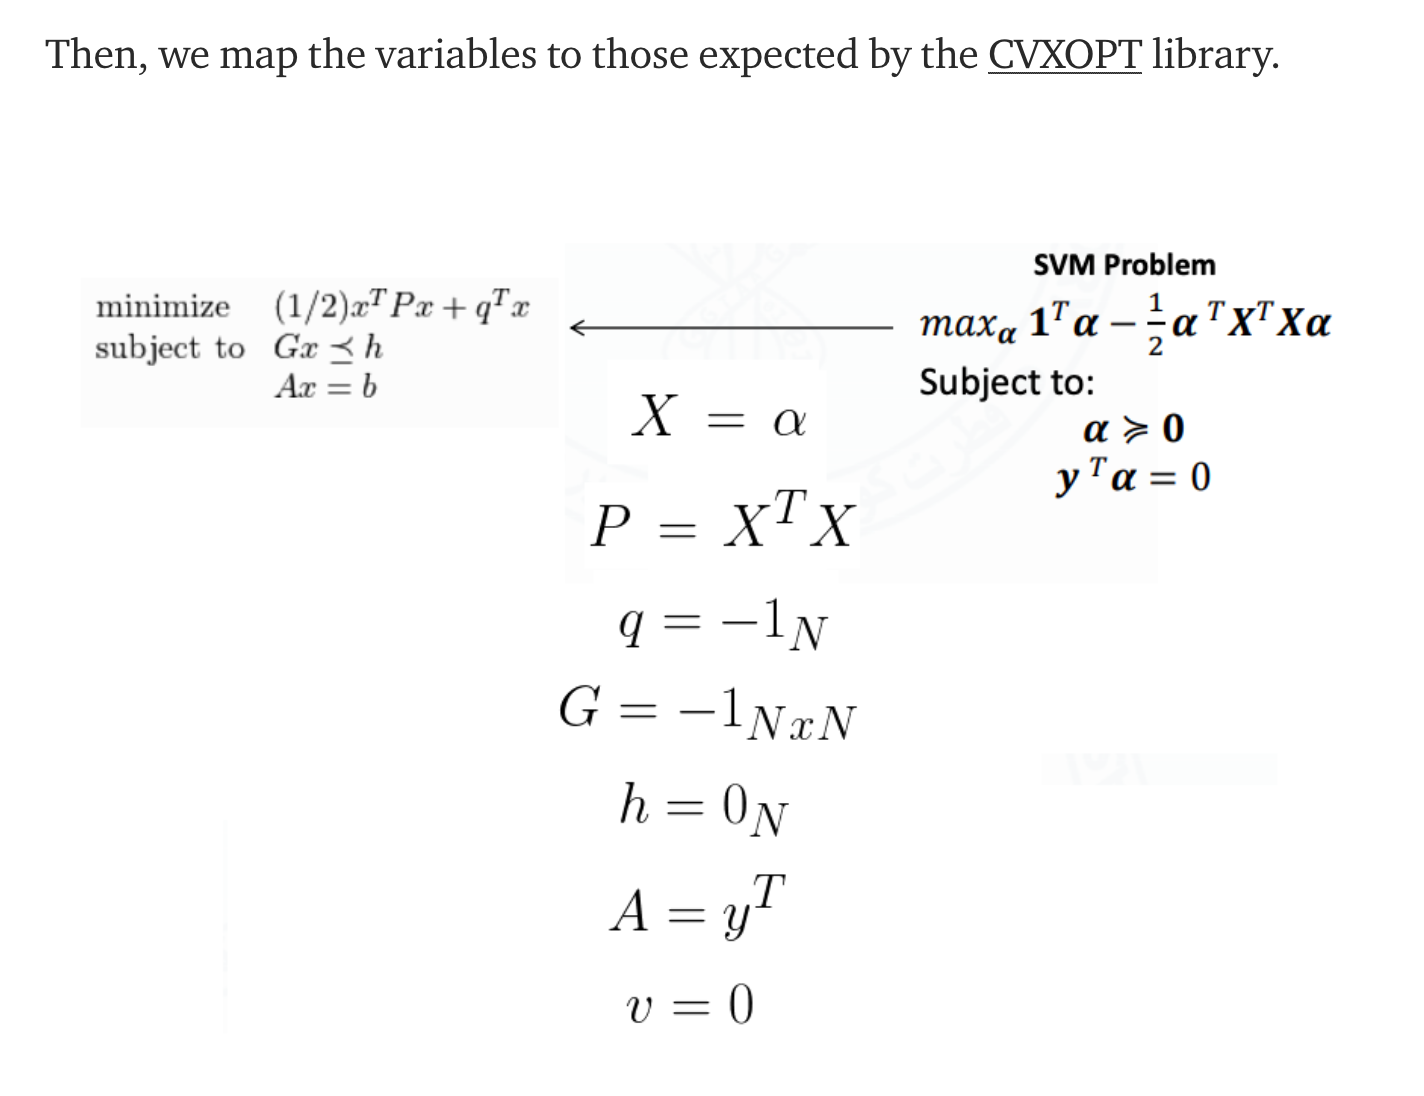

In [2]:
from IPython.display import Image
Image("/Users/d.merkushov/Desktop/conv.png")

In [14]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.6)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

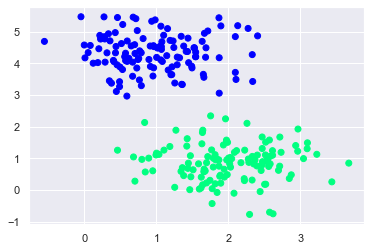

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [30]:
class LinearSVM():
    def __init__(self, C=1, gamma=1):
        self._C = C
        self._gamma = gamma
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        # P = X^T X
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -self._C)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
        # Множители Лагранжа
        a = np.ravel(solution['x'])
        
        idx = a > 1e-5
        self.a = a[idx]
        self.sv = X[idx]
        self.sv_y = y[idx]

        self.w = np.zeros(n_features)
        for i in range(len(self.a)):
            self.w += self.a[i] * self.sv_y[i] * self.sv[i]

        self.b = np.dot(self.w, self.sv[i]) - self.sv_y[i]
    
    def project(self, X):
        return np.dot(X, self.w) - self.b

    def predict(self, X):
        return np.sign(self.project(X))
    
    def plot(self, X):
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
        y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
        X_, Y_ = np.meshgrid(y, x)

        xy = np.vstack([X_.ravel(), Y_.ravel()]).T
        P = self.project(xy).reshape(X_.shape)

        # plot decision boundary and margins
        ax.contour(X_, Y_, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  2e-15  1e-14
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  7e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  2e-15  7e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  5e-16  7e-15
Optimal solution found.


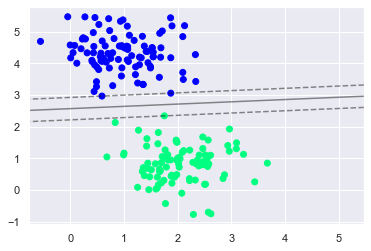

In [32]:
svm = LinearSVM(C=1)
svm.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
svm.plot(X_train)

In [33]:
pred = svm.predict(X_test)
target = y_test

In [34]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print(classification_report(target, pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



# Нелинейный случай

In [35]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

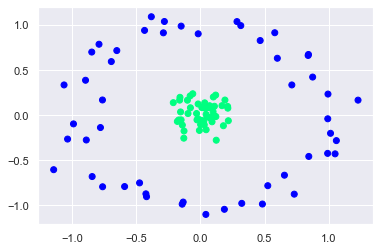

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
svm = LinearSVM(C=1)
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -7.4422e+01 -1.6387e+02  9e+01  4e-15  2e+00
 1: -1.6833e+02 -1.7235e+02  4e+00  7e-15  1e+00
 2: -7.1997e+03 -7.2041e+03  4e+00  5e-13  1e+00
 3: -1.1478e+07 -1.1478e+07  7e+01  2e-08  1e+00
 4: -1.8070e+11 -1.8070e+11  1e+06  2e-05  1e+00
Terminated (singular KKT matrix).


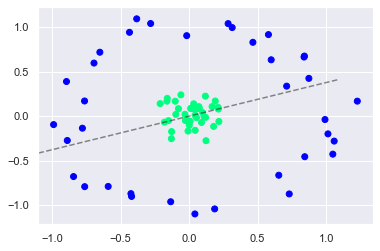

In [39]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
svm.plot(X_train)

## Kernel SVM

In [43]:
class KernelSVM:
    def __init__(self, C=1, ker='rbf', gamma=1):
        self._C = C
        self._Ker = self.linear
        if ker=='rbf': self._Ker = self.rbf
        self._gamma = gamma
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.rbf(X[i], X[j])
        # P = X^T X
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -self._C)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
        # Множители Лагранжа
        a = np.ravel(solution['x'])
        
        idx = a > 1e-5
        self.a = a[idx]
        self.sv = X[idx]
        self.sv_y = y[idx]

        self.w = np.zeros(n_features)
        for i in range(len(self.a)):
            self.w += self.a[i] * self.sv_y[i] * self.sv[i]

        self.b = self._Ker(self.w, self.sv[i]) - self.sv_y[i]
    
    def rbf(self, x, y):
        if len(x.shape) > 1:
            return np.exp(-np.diagonal(np.dot(x-y, (x-y).T)) * self._gamma)
        else: 
            return np.exp(-(np.dot(x-y, (x-y).T)))
        
    def linear(self, x, y):
        return np.dot(x, y.T)
    
    def project(self, X):
        sum = 0
        for n in range(len(self.a)):
            sum += self.a[n] * self.sv_y[n] * self._Ker(X, self.sv[n])
        return sum + self.b

    def predict(self, X):
        return np.sign(self.project(X))
    
    def plot(self, X):
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 30)
        y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 30)
        X_, Y_ = np.meshgrid(y, x)

        xy = np.vstack([X_.ravel(), Y_.ravel()]).T
        P = self.project(xy).reshape(X_.shape)

        # plot decision boundary and margins
        ax.contour(X_, Y_, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
svm = KernelSVM(C=1, ker='rbf',gamma=5)
svm.fit(X_train, y_train)

svm.plot(X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

     pcost       dcost       gap    pres   dres
 0: -5.2458e+00 -1.5976e+01  1e+02  1e+01  2e+00
 1: -1.3258e+00 -1.6275e+01  1e+01  1e-15  6e-16
 2: -5.0761e+00 -7.5792e+00  3e+00  6e-16  5e-16
 3: -6.2919e+00 -6.9231e+00  6e-01  4e-16  4e-16
 4: -6.6211e+00 -6.8719e+00  3e-01  8e-16  5e-16
 5: -6.7901e+00 -6.8142e+00  2e-02  1e-15  5e-16
 6: -6.8086e+00 -6.8090e+00  4e-04  1e-15  6e-16
 7: -6.8089e+00 -6.8089e+00  4e-06  1e-15  7e-16
Optimal solution found.


AttributeError: module 'numpy' has no attribute '_Ker'

In [ ]:
pred = svm.predict(X_test)
target = y_test

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print(classification_report(target, pred))

# SVM как качественный классификатор

In [9]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


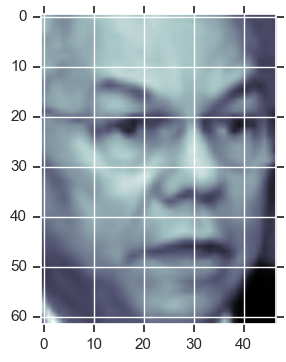

In [10]:
plt.imshow(faces.images[0], cmap='bone')

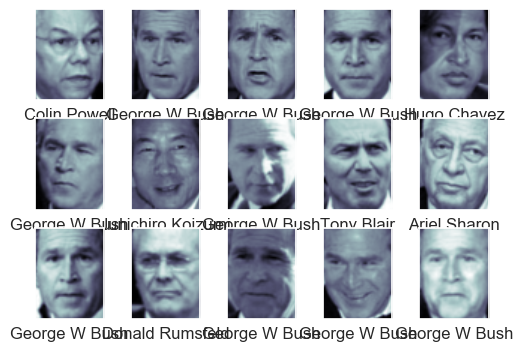

In [11]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [12]:
X = faces.data
y = faces.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=42)

/Users/d.merkushov/Work/Python/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
pred = svm.predict(X_test)
target = y_test

In [16]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

print(classification_report(target, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.00      0.00      0.00        68
          2       0.00      0.00      0.00        31
          3       0.37      1.00      0.54       126
          4       0.00      0.00      0.00        23
          5       0.00      0.00      0.00        20
          6       0.00      0.00      0.00        12
          7       0.00      0.00      0.00        42

avg / total       0.14      0.37      0.20       337



In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                random_state=42)

from sklearn.svm import SVC
svm = SVC(C=10, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print(classification_report(target, pred))

# PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150,whiten=True)
pca.fit(faces.data)
X = pca.transform(faces.data)

In [18]:
X.shape

(1348, 150)

In [19]:
y = faces.target

In [20]:
import random
test_frac = 0.3
num = len(X) * test_frac
ids_test = np.random.choice(range(len(X)), int(num))

In [21]:
ids_train = set(np.arange(len(X))) - set(ids_test)
ids_train = np.array(list(ids_train))
print(len(ids_train), len(ids_test))

1018 404


In [22]:
X_train = X[ids_train]
y_train = faces.target[ids_train]
X_test = X[ids_test]
y_test = faces.target[ids_test]

In [23]:
from sklearn.svm import SVC
svm = SVC(C=1, gamma=0.001, kernel='rbf', class_weight='balanced')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print(classification_report(target, pred))

             precision    recall  f1-score   support

          0       0.45      0.75      0.56        12
          1       0.86      0.84      0.85        83
          2       0.73      0.86      0.79        28
          3       0.93      0.89      0.91       167
          4       0.81      0.76      0.79        34
          5       0.73      0.80      0.76        20
          6       0.93      0.67      0.78        21
          7       0.76      0.79      0.77        39

avg / total       0.85      0.84      0.84       404



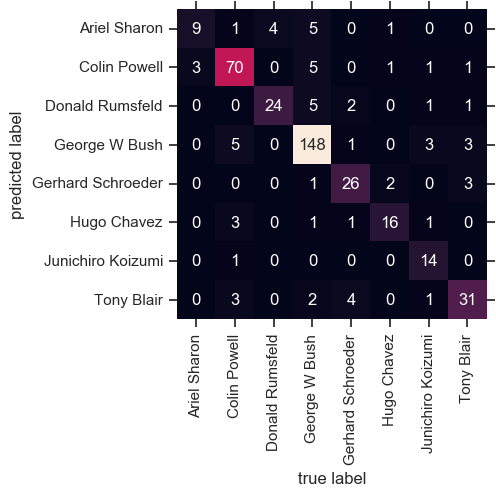

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Draw Misclassification

In [27]:
mask = np.logical_and(pred==1, target==6)
ids_misclf = ids_test[mask]

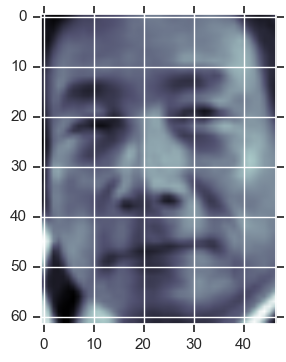

In [29]:
pic = faces.images[ids_misclf[0]]
plt.imshow(pic, cmap='bone')

## Self kernelSVM

In [ ]:
y = faces.target == 1
y = np.array([1. if j else -1. for j in y])

In [ ]:
X_train = X[ids_train]
y_train = y[ids_train]
X_test = X[ids_test]
y_test = y[ids_test]

In [ ]:
svm = KernelSVM(C=10, gamma=0.001, ker='rbf')
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print(classification_report(target, pred))

# Cross Validation

In [ ]:
y = faces.target

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, y_train = None, None
X_test, y_test = None, None
X_val, y_val = None, None

In [ ]:
import itertools

best_model = None
best_f1 = 0
best_params = None

grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

for c,gamma in itertools.product(grid['C'], grid['gamma']):
    pass

In [ ]:
best_params

In [ ]:
pred = best_model.predict(X_test)
target = y_test

from sklearn.metrics import precision_score, accuracy_score, classification_report
print(classification_report(target, pred))